Marina Dunn

PHYS 243 HW2

Fall 2021

Prof. Mobasher

Goal: Extract meaningful relationships from a dataset using regression and gradient descent! Using a dataset on Kaggle.com called "Coffee and Code Dataset," take a look at the data. As the name implies, the dataset includes information about how cups of coffee may affect coding performance! Some interesting data points include -CodingHours, CoffeeCupsPerDay, CoffeeTime, and CoffeeSolveBugs. 

#### Part 1: Visualize your data!
Can you find a relationship between any of the parameters? Play around with using a scatter plot or a 2dhistogram (i.e. density plot) to map out some of the potential relationships. Check whether or not imposing a mask improves some of these trends.

#### Part 2: Perform a regression!
Similar to Week 2's collab, choose an algorithm to fit your dataset (using linear regression, or other) and measure the performance of your fit with a loss function of your choosing.

#### Part 3: Real world constraints!
In this example, we might have made some assumptions about how our activation function (e.g. function that best describes the relationship between the inputs and outputs) behaves as x or y -> inf. What real world constraints should we put on this dataset to potentially better predict the relationship between our data at the boundaries? If you were able to request more information from the researcher, what other labels/features might have helped you better model the dataset?

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import os
import sklearn
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/coffee-and-code-dataset/CoffeeAndCodeLT2018 - CoffeeAndCodeLT2018.csv


In [2]:
df = pd.read_csv('../input/coffee-and-code-dataset/CoffeeAndCodeLT2018 - CoffeeAndCodeLT2018.csv')
df

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29
...,...,...,...,...,...,...,...,...,...
95,6,2,Before coding,Yes,Nescafe,Yes,Male,Lebanon,18 to 29
96,4,1,Before coding,Sometimes,Nescafe,Sometimes,Female,Lebanon,18 to 29
97,10,3,Before coding,Yes,Cappuccino,Yes,Male,Lebanon,Under 18
98,2,2,While coding,Sometimes,Espresso (Short Black),Sometimes,Female,Lebanon,18 to 29


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CodingHours          100 non-null    int64 
 1   CoffeeCupsPerDay     100 non-null    int64 
 2   CoffeeTime           100 non-null    object
 3   CodingWithoutCoffee  100 non-null    object
 4   CoffeeType           99 non-null     object
 5   CoffeeSolveBugs      100 non-null    object
 6   Gender               100 non-null    object
 7   Country              100 non-null    object
 8   AgeRange             98 non-null     object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [4]:
df.describe()

,CodingHours,CoffeeCupsPerDay
count,100.000000,100.000000
mean,6.410000,2.890000
std,2.644205,1.613673
min,1.000000,1.000000
25%,4.000000,2.000000
50%,7.000000,2.500000
75%,8.000000,4.000000
max,10.000000,8.000000


In [5]:
df.isnull().sum()

CodingHours            0
CoffeeCupsPerDay       0
CoffeeTime             0
CodingWithoutCoffee    0
CoffeeType             1
CoffeeSolveBugs        0
Gender                 0
Country                0
AgeRange               2
dtype: int64

In [6]:
#instead of deleting rows with NaN values and losing data, will 
#fill with mean value of column so as not to change shape of dataset

masked_df = df.fillna(df.mean())

print(masked_df.shape)
print(masked_df.describe())

(100, 9)
       CodingHours  CoffeeCupsPerDay
count   100.000000        100.000000
mean      6.410000          2.890000
std       2.644205          1.613673
min       1.000000          1.000000
25%       4.000000          2.000000
50%       7.000000          2.500000
75%       8.000000          4.000000
max      10.000000          8.000000


**Understanding the Data**

Parameters

CodingHours: no if coding hours

CoffeeCupsPerDay: no of coffee cups and day

CoffeeTime: time of coding in a day

CodingWithoutCoffee: Coffee without coding

CoffeeType: Type of coffee

CoffeeSolveBugs: type of bug solver

Gender: gender

Country: country (Lebanon is the only country present in this dataset)

AgeRange: age range of the person

Hypotheses: I suspect that there will be a correlation between individuals who drink more coffee earlier in the day will have longer more productive hours, especially those in the younger age range consuming more cups. 

As far as the types of coffee, I would guess those containing more pure espresso would be more popular. I would also suspect individuals would probably begin drinking earlier in the day with maybe a couple additional cups throughout the day, and it will yield more coding hours, and likely more success solving coding bugs.

As this sample of data is from residents of Lebanon, who are known to drink coffee often, I expect there to be more instances of darker drip coffee/espresso being consumed throughout in the day. Lebanon is highly influenced by Turkish culture, which is known for their coffee; there is apparently a Turkish proverb that says, "Coffee should be black as hell, strong as death, and sweet as love." There are 2 customary times to have coffee: Ahwet El Ahla w Sahla, the welcoming coffee when you first arrive, and Ahwet El Ma3 As-Salameh, the goodbye coffee before you leave. According to https://theculturetrip.com/middle-east/lebanon/articles/what-coffee-means-to-lebanese-people/, coffee is essential to Lebanese culture, with residents drinking it throughout the day.

The country feature will not impact our analysis as it is the same for all points.

Personally, I tend to code better during evening hours and consistently drink coffee throughout the day, and even more while coding, so I will be intereseted to see if this is similar to others.

**Visualize the Data**

##### Some relationships to look at:
1. Gender-CoffeeType
2. AgeRange-CoffeeCupsPerDay
3. Gender-CoffeeCupsPerDay
4. CodingHours-CoffeeCupsPerDay
5. CoffeeSolveBugs-CoffeeCupsPerDay
6. CodingWithoutCoffee-CoffeeSolveBugs
7. AgeRange-CoffeeType
8. Gender-CodingHours
9. CodingHours-CoffeeSolveBugs
10. Gender-CoffeeTime
11. AgeRange-CoffeeTime
12. CodingHours-CoffeeTime

In [7]:
features = ['CoffeeSolveBugs', 'CodingHours', 'CoffeeCupsPerDay', 'CoffeeType', 'CoffeeTime', 'Gender', 'AgeRange']

In [8]:
def count_plot(variable):
    """
        input: variable example: "CoffeeTime"
        output: count plot and value count
    """
    # get feature
    var = masked_df[variable]
    
    #visualization
    plt.figure(figsize=(10,4))
    sns.countplot(x=var, palette="dark", order=var.value_counts().index)
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.title(variable)
    print("{}".format(var.value_counts()))
    plt.show()

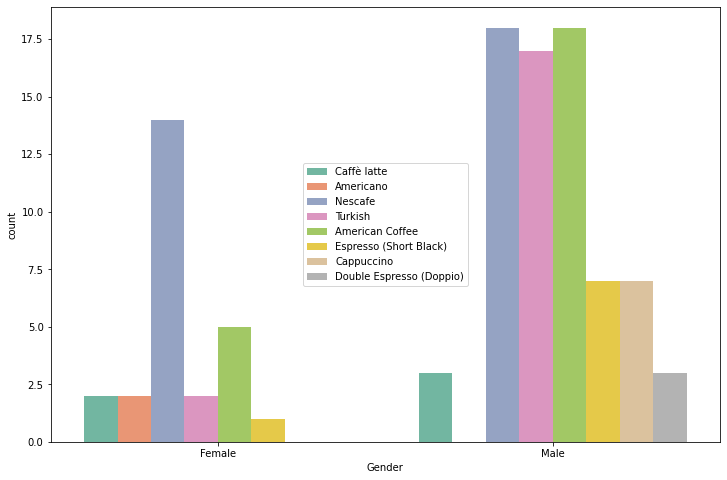

In [9]:
#Gender-CoffeeType
plt.figure(figsize=(12,8))
sns.countplot("Gender", data=masked_df, hue="CoffeeType", palette="Set2")
plt.legend(loc="center")

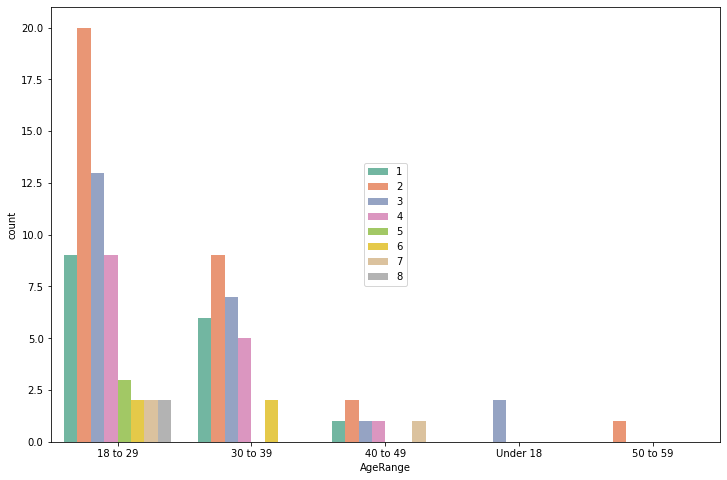

In [10]:
#AgeRange-CoffeeCupsPerDay
plt.figure(figsize=(12,8))
sns.countplot("AgeRange", data=masked_df, hue="CoffeeCupsPerDay", palette="Set2")
plt.legend(loc="center")

<AxesSubplot:xlabel='AgeRange', ylabel='CoffeeCupsPerDay'>

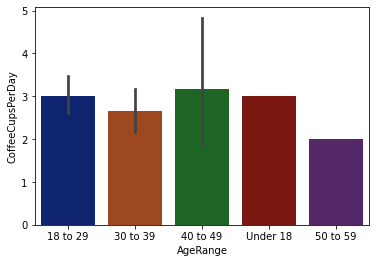

In [11]:
# another view
sns.barplot(x="AgeRange", y="CoffeeCupsPerDay", data=masked_df, palette="dark")

As expected, coffee is consumed more by younger adults, with the most popular amount in the age groups being 2 cups of coffee per day, then typically 3. These age groups are also where we expect to see the majority of adults who have careers that involve coding.

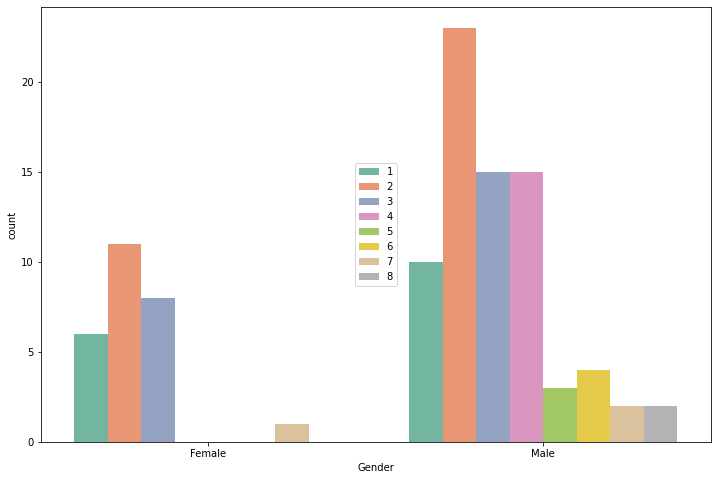

In [12]:
#Gender-CoffeeCupsPerDay
plt.figure(figsize=(12,8))
sns.countplot("Gender", data=masked_df, hue="CoffeeCupsPerDay", palette="Set2")
plt.legend(loc="center")

<AxesSubplot:xlabel='Gender', ylabel='CoffeeCupsPerDay'>

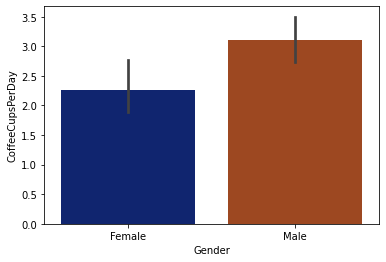

In [13]:
# another view
sns.barplot(x="Gender", y="CoffeeCupsPerDay", data=masked_df, palette="dark")

In [14]:
mask_male = masked_df[masked_df.Gender == 'Male']
mask_female = masked_df[masked_df.Gender == 'Female']

print(f"Average cups of coffee for anyone while coding is {round(df.CoffeeCupsPerDay.mean(),2)} cups per day")
print(f"Average cups of coffee for male while coding is {round(mask_male.CoffeeCupsPerDay.mean(),2)} cups per day")
print(f"Average cups of coffee for female while coding is {round(mask_female.CoffeeCupsPerDay.mean(),2)} cups per day")


Average cups of coffee for anyone while coding is 2.89 cups per day
Average cups of coffee for male while coding is 3.11 cups per day
Average cups of coffee for female while coding is 2.27 cups per day


Male adults seem to drink more coffee on average than females when coding. There may be factors such as availability of coffee, or social stigma of drinking coffee at work based on gender.

<AxesSubplot:xlabel='CoffeeCupsPerDay', ylabel='CodingHours'>

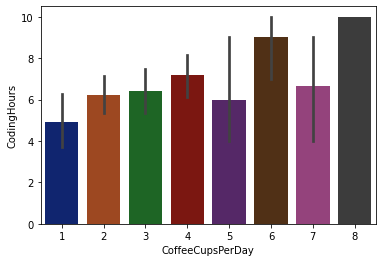

In [15]:
#CodingHours-CoffeeCupsPerDay
sns.barplot(x="CoffeeCupsPerDay", y="CodingHours", data=masked_df, palette="dark")

<AxesSubplot:xlabel='CoffeeCupsPerDay', ylabel='CodingHours'>

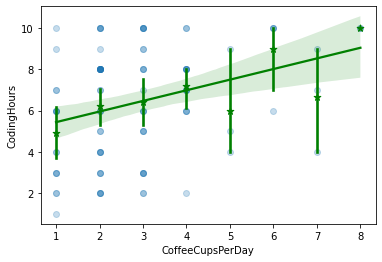

In [16]:
# regression line, no masks imposed
plt.scatter(x="CoffeeCupsPerDay", y="CodingHours",data=masked_df, alpha=0.25)
sns.regplot(x="CoffeeCupsPerDay", y="CodingHours", data = masked_df, marker="*", color="g", x_estimator=np.mean)

Text(0, 0.5, 'Frequency')

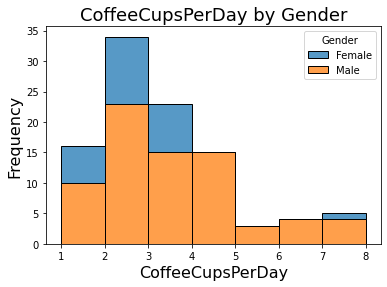

In [17]:
# Making 2D histogram
sns.histplot(data=masked_df, x='CoffeeCupsPerDay', hue="Gender", multiple="stack", binwidth=1)
plt.title('CoffeeCupsPerDay by Gender', fontsize=18)
plt.xlabel('CoffeeCupsPerDay', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

<AxesSubplot:title={'center':'Coffee Cups per day v. Coding Hours in Females'}, xlabel='CoffeeCupsPerDay', ylabel='CodingHours'>

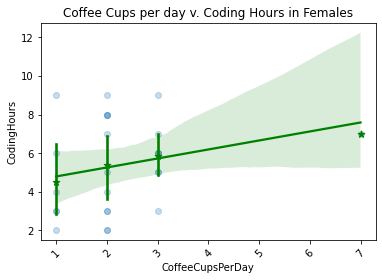

In [18]:
# broken up by gender, masks imposed
mask = (masked_df['Gender']=="Female")
plt.scatter(masked_df['CoffeeCupsPerDay'][mask],masked_df['CodingHours'][mask], alpha=0.25)
plt.xticks(rotation=45)
plt.xlabel("CoffeeCupsPerDay")
plt.ylabel("CodingHours")
plt.title('Coffee Cups per day v. Coding Hours in Females')
sns.regplot(masked_df['CoffeeCupsPerDay'][mask],masked_df['CodingHours'][mask], data = masked_df, marker="*", color="g", x_estimator=np.mean)

<AxesSubplot:title={'center':'Coffee Cups per day v. Coding Hours in Males'}, xlabel='CoffeeCupsPerDay', ylabel='CodingHours'>

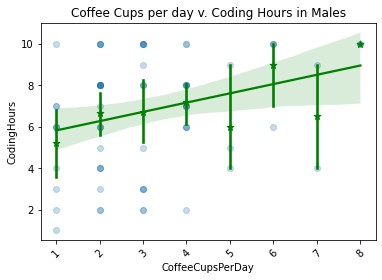

In [19]:
# masks imposed
mask = (masked_df['Gender']=="Male")
plt.scatter(masked_df['CoffeeCupsPerDay'][mask],masked_df['CodingHours'][mask], alpha=0.25)
plt.xticks(rotation=45)
plt.xlabel("CoffeeCupsPerDay")
plt.ylabel("CodingHours")
plt.title('Coffee Cups per day v. Coding Hours in Males')
sns.regplot(masked_df['CoffeeCupsPerDay'][mask],masked_df['CodingHours'][mask], data = masked_df, marker="*", color="g", x_estimator=np.mean)

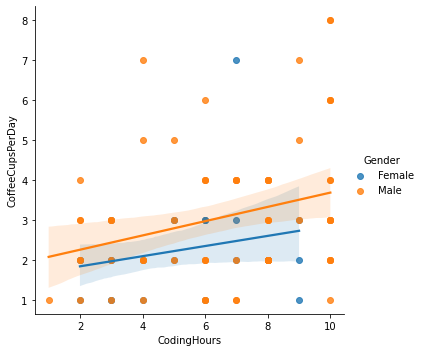

In [20]:
sns.lmplot(x='CodingHours', y='CoffeeCupsPerDay', hue='Gender', data=masked_df)

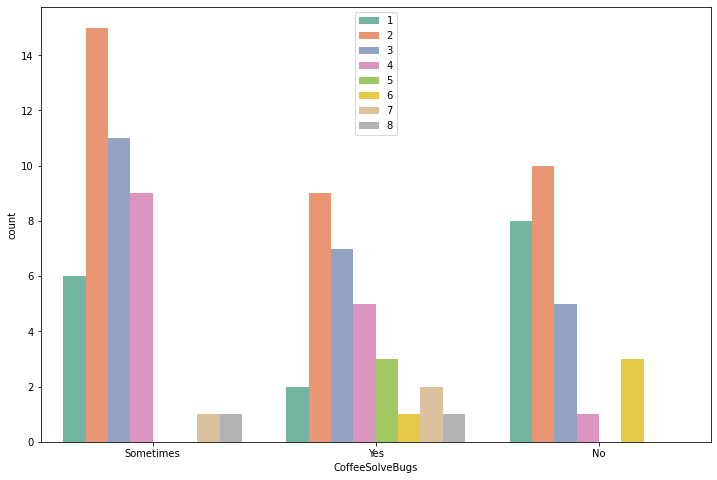

In [21]:
#CoffeeSolveBugs-CoffeeCupsPerDay
plt.figure(figsize=(12,8))
sns.countplot("CoffeeSolveBugs", data=masked_df, hue="CoffeeCupsPerDay", palette="Set2")
plt.legend(loc="upper center")

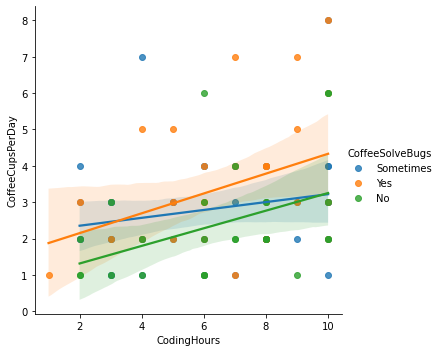

In [22]:
sns.lmplot(x='CodingHours', y='CoffeeCupsPerDay', hue='CoffeeSolveBugs', data=masked_df)

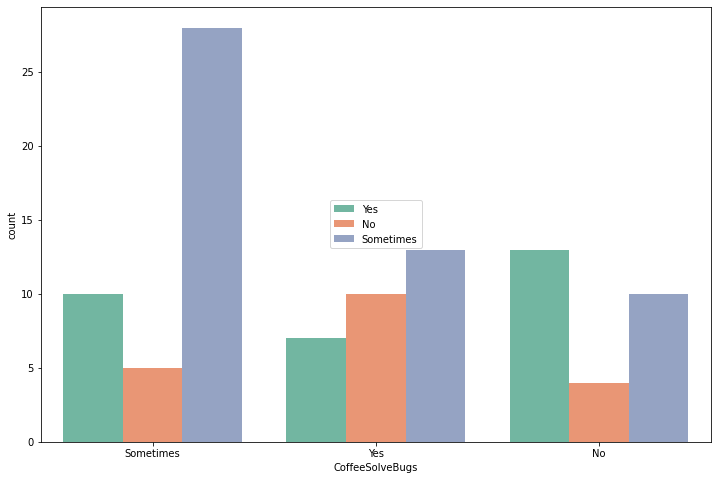

In [23]:
#CodingWithoutCoffee-CoffeeSolveBugs
plt.figure(figsize=(12,8))
sns.countplot("CoffeeSolveBugs", data=masked_df, hue="CodingWithoutCoffee", palette="Set2")
plt.legend(loc="center")

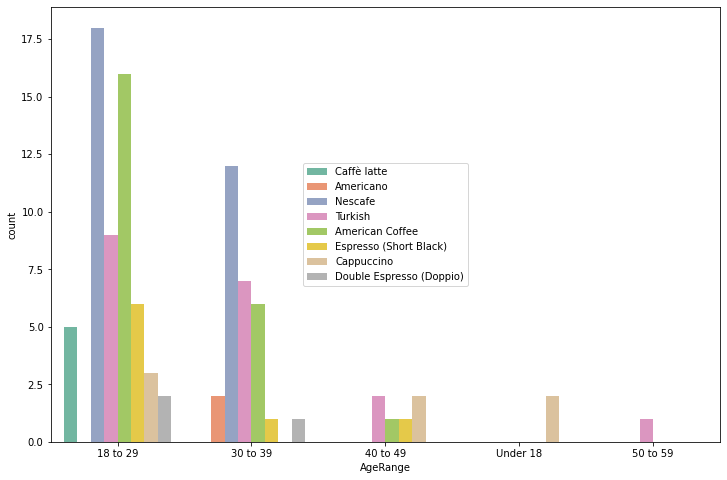

In [24]:
#AgeRange-CoffeeType
plt.figure(figsize=(12,8))
sns.countplot("AgeRange", data=masked_df, hue="CoffeeType", palette="Set2")
plt.legend(loc="center")

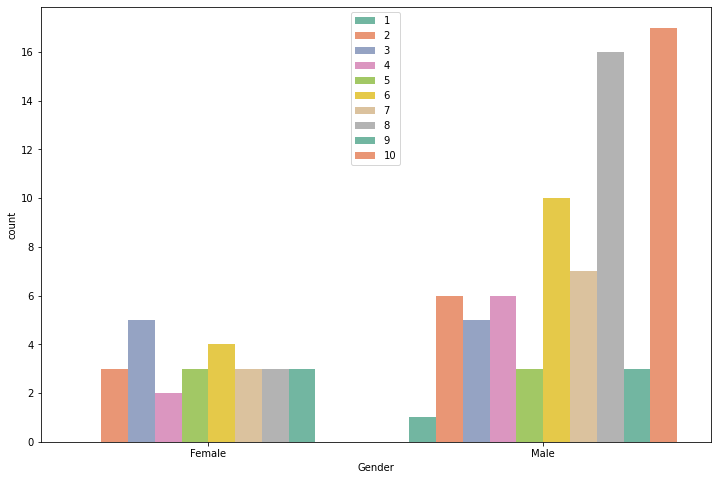

In [25]:
#Gender-CodingHours
plt.figure(figsize=(12,8))
sns.countplot("Gender", data=masked_df, hue="CodingHours", palette="Set2")
plt.legend(loc="upper center")

<AxesSubplot:xlabel='Gender', ylabel='CodingHours'>

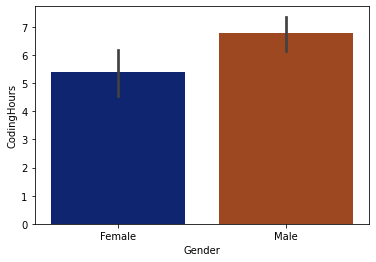

In [26]:
# another view
sns.barplot(x="Gender", y="CodingHours", data=masked_df, palette="dark")

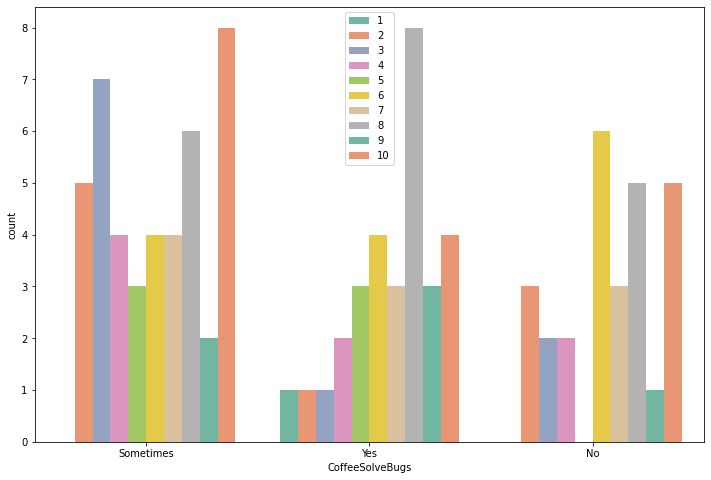

In [27]:
#CodingHours-CoffeeSolveBugs
plt.figure(figsize=(12,8))
sns.countplot("CoffeeSolveBugs", data=masked_df, hue="CodingHours", palette="Set2")
plt.legend(loc="upper center")

<AxesSubplot:xlabel='CoffeeTime', ylabel='count'>

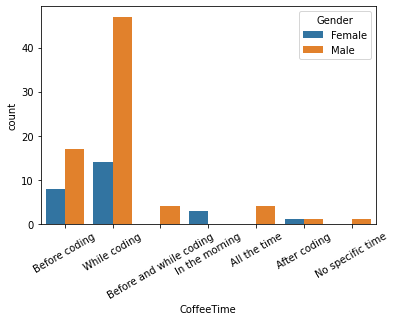

In [28]:
#Gender-CoffeeTime
plt.xticks(rotation=30)
sns.countplot(data=masked_df, x='CoffeeTime', hue='Gender')

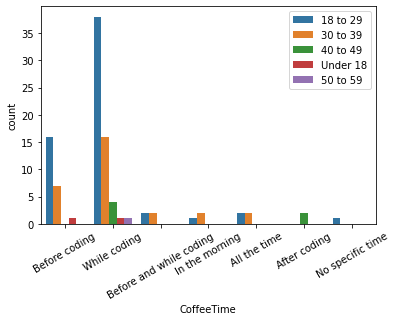

In [29]:
#AgeRange-CoffeeTime
plt.xticks(rotation=30)
sns.countplot(data=masked_df, x='CoffeeTime', hue='AgeRange')
plt.legend(loc="upper right")

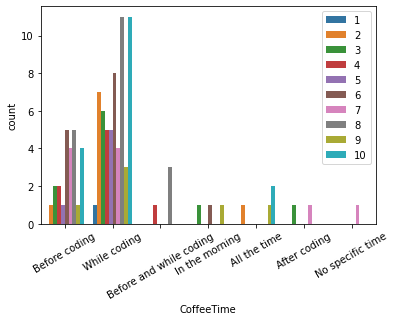

In [30]:
#CodingHours-CoffeeTime
plt.xticks(rotation=30)
sns.countplot(data=masked_df, x='CoffeeTime', hue='CodingHours')
plt.legend(loc="upper right")

Other Visualisations

Nescafe                     32
American Coffee             23
Turkish                     19
Espresso (Short Black)       8
Cappuccino                   7
Caffè latte                  5
Double Espresso (Doppio)     3
Americano                    2
Name: CoffeeType, dtype: int64


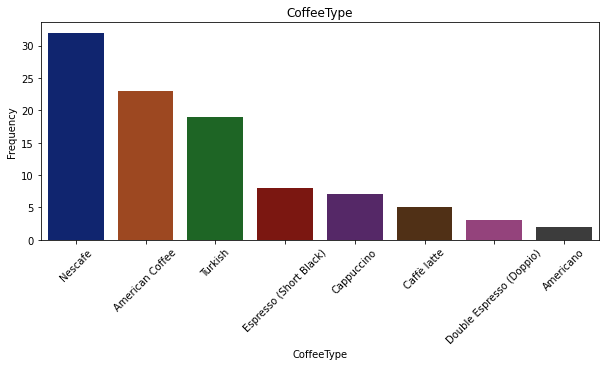

In [31]:
count_plot('CoffeeType')

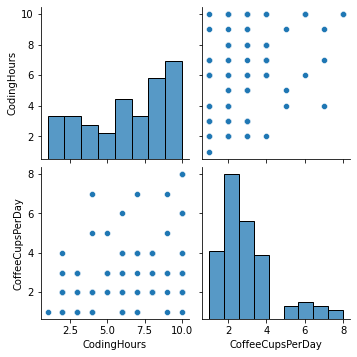

In [32]:
sns.pairplot(masked_df)

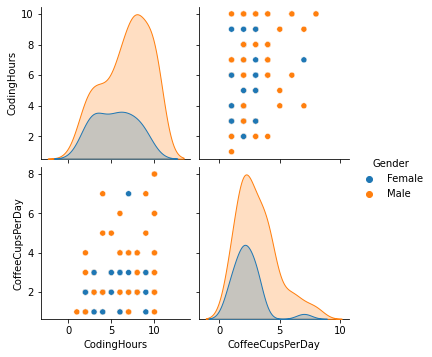

In [33]:
sns.pairplot(masked_df, hue='Gender')

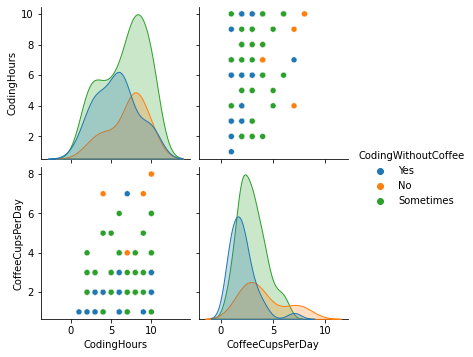

In [34]:
sns.pairplot(masked_df, hue='CodingWithoutCoffee')

Sometimes    43
Yes          30
No           27
Name: CoffeeSolveBugs, dtype: int64


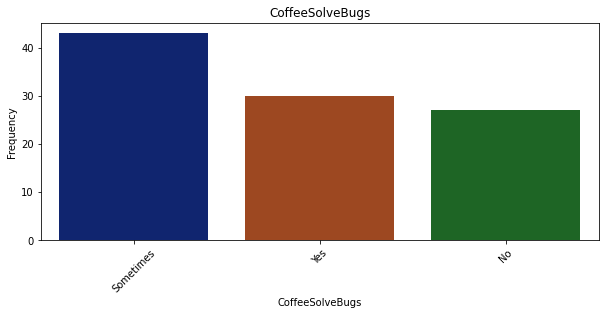

8     19
10    17
6     14
3     10
7     10
2      9
4      8
5      6
9      6
1      1
Name: CodingHours, dtype: int64


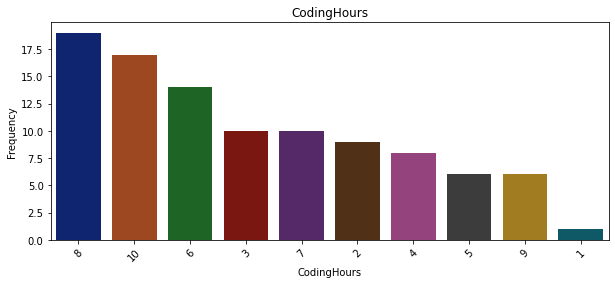

2    34
3    23
1    16
4    15
6     4
5     3
7     3
8     2
Name: CoffeeCupsPerDay, dtype: int64


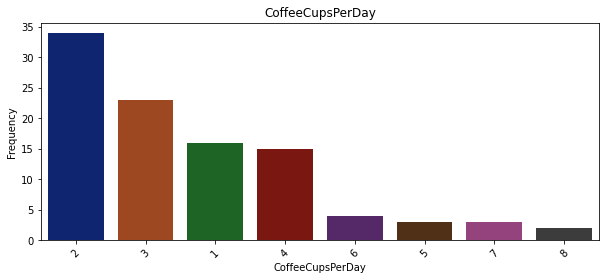

Nescafe                     32
American Coffee             23
Turkish                     19
Espresso (Short Black)       8
Cappuccino                   7
Caffè latte                  5
Double Espresso (Doppio)     3
Americano                    2
Name: CoffeeType, dtype: int64


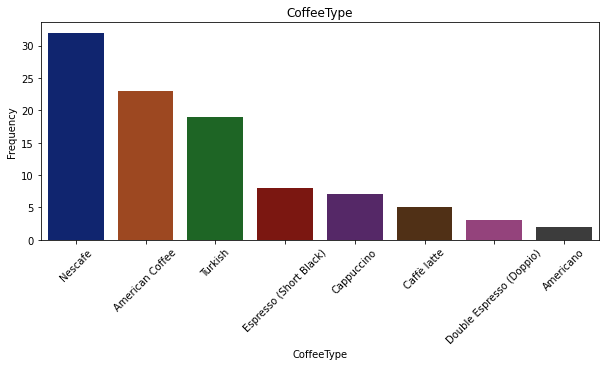

While coding               61
Before coding              25
Before and while coding     4
All the time                4
In the morning              3
After coding                2
No specific time            1
Name: CoffeeTime, dtype: int64


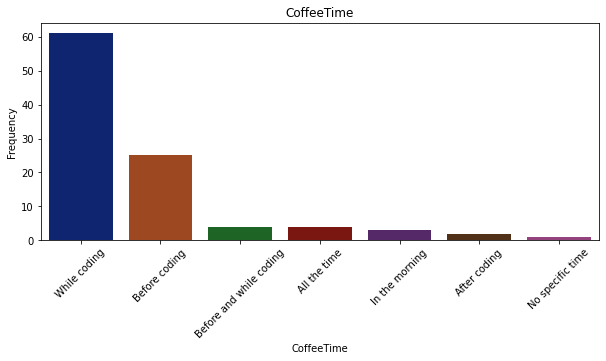

Male      74
Female    26
Name: Gender, dtype: int64


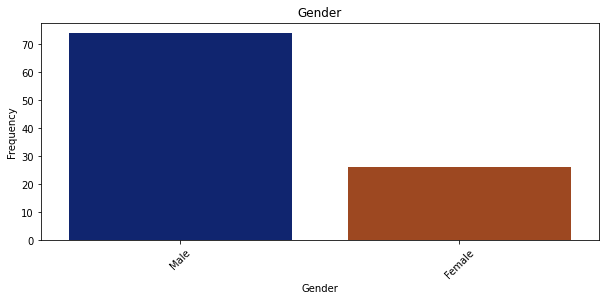

18 to 29    60
30 to 39    29
40 to 49     6
Under 18     2
50 to 59     1
Name: AgeRange, dtype: int64


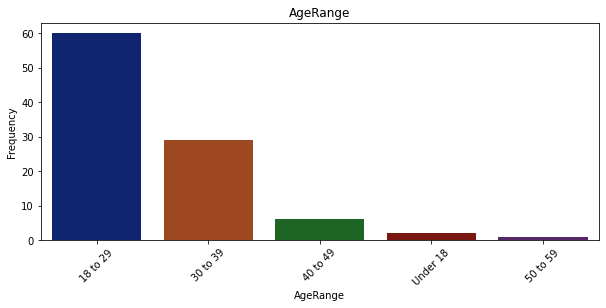

In [35]:
categorical = features
for i in categorical:
    count_plot(i)

**Conclusions & Real-world Constraints**

Several visualizations have been made for the dataset above. We can draw several conclusions from these, but note that there may be additional factors, including societal factors, that this dataset does not take into account.

* Overall, male coders on average seem to drink more coffee during the day than female coders. Male coders also appear to spend more hours coding.
* The average coffee consumed by individuals while coding is 2.89 cups. Males drink on average 3.11 cups of coffee per day when coding, while females drink on average 2.27 cups per day while coding.
* The youngest age group of coders, 18-29, seems to drink the most coffee, decreasing as the age groups become older. 
* The most popular drink with 18-29 year olds and with 30-39 year olds is Nescafe (followed closely by American coffee for 18-29 year olds and Turkish coffee for 30-39 year olds), a tie of Tukish coffee and cappuccinos with 40-49 year olds, Turkish coffee with 50-59 year olds, and cappuccinos for those under 18.
* Nescafe is most popular among female coders, with Nescafe and American coffee tying among male coders (followed very closely by Turkish coffee).
* There is not necessarily a strong correlation between consuming more cups of coffee yielding more hours spent coding or fixes in bugs when coding. For example, almost an equal amount of people who drank around 2 cups a day both solved bugs and did not. For the most part, most coders believe that drinking coffee helps solve bugs at least sometimes.
* It is more popular to drink coffee when coding than when not.

When looking at the CoffeeCupsPerDay - CodingHours relationship, imposing
masks to isolate by gender did not necessarily improve the the fit of the regression line looking at the scatter plot, but it is easier to visualize the relationship looking at the 2D histogram.

Constraints:
* In Lebanese work culture, typical work days are only 8 hours long Monday - Friday, with Saturday being a possible partial workday.
* Coffee availability may be limited to instant machines in offices which may only serve certain kinds of coffee, like Nescafe, which is one reason it might be so popular
* percentage of female and male coders in job market in lebanon, which is likely uneven
* cost of coffee

Other helpful features to know: if individual codes in an office or elsewhere, coffee purchased from a shop or machine, this set focuses on only Lebanon but expanding to other countries or breaking up this dataset into rural/urban/suburban areas, career level (i.e. entry-level, manager, senior engineer, etc.), expanding to non-binary individuals, potentially changing solving bugs category to something else to measure productivity better.
